# Modelos de Machine Learning - Trabalho Humberto
César Macieira

## Instalando e Carregando Pacotes

In [1]:
import time
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor

shatter_mod = shatter_mod.drop(columns=['Unnamed: 0'])
shatter_mod = shatter_mod.rename(columns={'Velocidade esteira (m/min)': 'Velocidade_esteira', '>6,30mm': 'maior6.30mm', 
                                          '% Umidade mistura 1': 'Umidade_mistura', '<0,106mm': 'menor0.106mm'})

## Construindo os modelos

In [2]:
from pycaret.regression import *

In [3]:
var_exp = ['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']
var_exp_SA = ['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']

## QtdAtendimentosMedicos

In [4]:
treino_QtdAtendimentosMedicos = pd.read_excel('treino QtdAtendimentosMedicos.xlsx')
teste_QtdAtendimentosMedicos = pd.read_excel('teste QtdAtendimentosMedicos.xlsx')
dados_QtdAtendimentosMedicos = pd.concat([treino_QtdAtendimentosMedicos, teste_QtdAtendimentosMedicos], ignore_index = True)

In [5]:
x_treino_QtdAtendimentosMedicos, x_teste_QtdAtendimentosMedicos = treino_QtdAtendimentosMedicos[var_exp], teste_QtdAtendimentosMedicos[var_exp]
y_treino_QtdAtendimentosMedicos = treino_QtdAtendimentosMedicos[['QtdAtendimentosMedicos']]
y_teste_QtdAtendimentosMedicos = teste_QtdAtendimentosMedicos[['QtdAtendimentosMedicos']]

In [6]:
%%time
modelos_pycaret_QtdAtendimentosMedicos = setup(data = dados_QtdAtendimentosMedicos, target='QtdAtendimentosMedicos', normalize = False, 
                                               train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdAtendimentosMedicos
2,Target type,Regression
3,Original data shape,"(169203, 46)"
4,Transformed data shape,"(169203, 74)"
5,Transformed train set shape,"(126902, 74)"
6,Transformed test set shape,"(42301, 74)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.2616,33.0826,5.7511,0.0425,0.7328,1.3997,5.8460
xgboost,Extreme Gradient Boosting,4.2811,33.4383,5.7820,0.0322,0.7350,1.3982,1.3340
br,Bayesian Ridge,4.3156,33.7021,5.8047,0.0245,0.7419,1.4319,1.6720
ada,AdaBoost Regressor,5.0394,39.8476,6.3068,-0.1533,0.8444,1.9441,3.5870
rf,Random Forest Regressor,4.7225,40.6007,6.3714,-0.1753,0.7917,1.5024,22.9720


CPU times: total: 8.59 s
Wall time: 6min 16s


GradientBoostingRegressor(random_state=13)

In [7]:
%%time
modelo_QtdAtendimentosMedicos = create_model('gbr').fit(x_treino_QtdAtendimentosMedicos, y_treino_QtdAtendimentosMedicos)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2570,33.2073,5.7626,0.0386,0.7360,1.4174
1,4.2487,32.2011,5.6746,0.0431,0.7268,1.3728
2,4.2875,32.5948,5.7092,0.0396,0.7437,1.4475
3,4.2537,33.7606,5.8104,0.0491,0.7309,1.3923
4,4.2674,34.2274,5.8504,0.0449,0.7313,1.3912
5,4.2171,31.0842,5.5753,0.0411,0.7317,1.4070
6,4.2552,32.6361,5.7128,0.0440,0.7309,1.3945
7,4.2786,33.5325,5.7907,0.0464,0.7341,1.4031
8,4.2682,32.8610,5.7325,0.0436,0.7325,1.3940


CPU times: total: 9.67 s
Wall time: 1min 24s


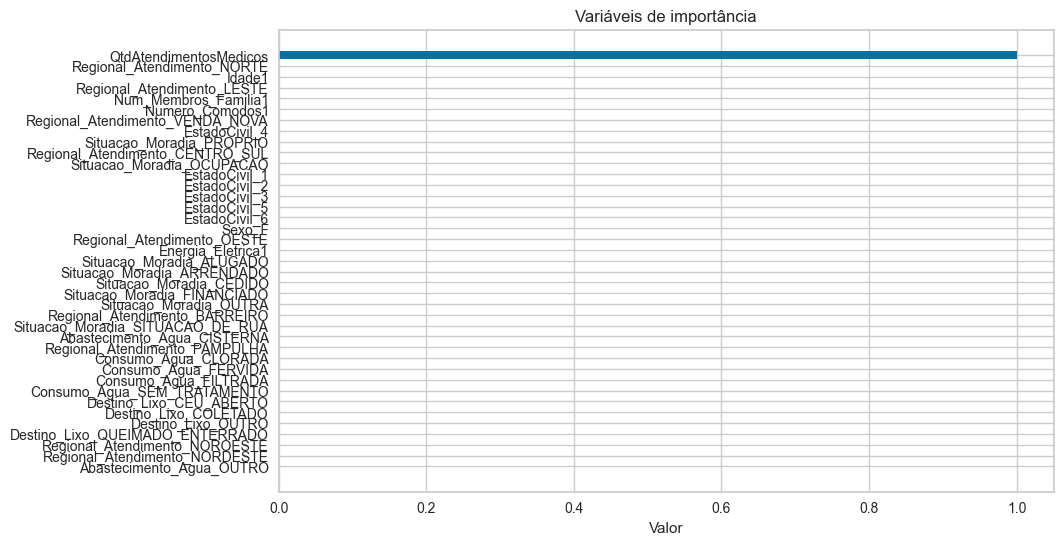

In [8]:
importance_features = modelo_QtdAtendimentosMedicos.feature_importances_
nomes_features = x_treino_QtdAtendimentosMedicos.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## QtdCID

In [9]:
%%time
treino_QtdCID = pd.read_excel('treino QtdCid.xlsx')
teste_QtdCID = pd.read_excel('teste QtdCid.xlsx')
dados_QtdCID = pd.concat([treino_QtdCID, teste_QtdCID], ignore_index = True)

CPU times: total: 22.4 s
Wall time: 1min 2s


### Com atendimentos

In [10]:
x_treino_QtdCID, x_teste_QtdCID = treino_QtdCID[var_exp], teste_QtdCID[var_exp]
y_treino_QtdCID, y_teste_QtdCID = treino_QtdCID[['QtdCID']], teste_QtdCID[['QtdCID']]

In [11]:
%%time
modelos_pycaret_QtdCid = setup(data = dados_QtdCID, target='QtdCID', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 47)"
4,Transformed data shape,"(169203, 75)"
5,Transformed train set shape,"(126902, 75)"
6,Transformed test set shape,"(42301, 75)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.3044,3.6843,1.9194,0.6178,0.3222,0.3823,5.4870
xgboost,Extreme Gradient Boosting,1.3123,3.7762,1.9432,0.6083,0.3238,0.3822,1.1860
br,Bayesian Ridge,1.4053,3.9435,1.9858,0.5909,0.3444,0.4617,1.3760
rf,Random Forest Regressor,1.3987,4.1565,2.0387,0.5688,0.3434,0.4112,21.9610
ada,AdaBoost Regressor,1.5772,4.6209,2.1494,0.5205,0.3882,0.5794,5.1200


CPU times: total: 11.1 s
Wall time: 6min 11s


GradientBoostingRegressor(random_state=13)

In [12]:
%%time
modelo_QtdCID = create_model('gbr').fit(x_treino_QtdCID, y_treino_QtdCID)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3153,3.8319,1.9575,0.6177,0.3242,0.3790
1,1.3033,3.6105,1.9001,0.6205,0.3212,0.3826
2,1.2922,3.6466,1.9096,0.6253,0.3198,0.3783
3,1.3012,3.7015,1.9239,0.6198,0.3225,0.3852
4,1.3045,3.7408,1.9341,0.6164,0.3219,0.3799
5,1.3064,3.6284,1.9048,0.6104,0.3237,0.3858
6,1.3192,3.7573,1.9384,0.6083,0.3231,0.3841
7,1.3069,3.6919,1.9214,0.6202,0.3227,0.3839
8,1.2960,3.5983,1.8969,0.6193,0.3204,0.3822


CPU times: total: 13 s
Wall time: 1min 20s


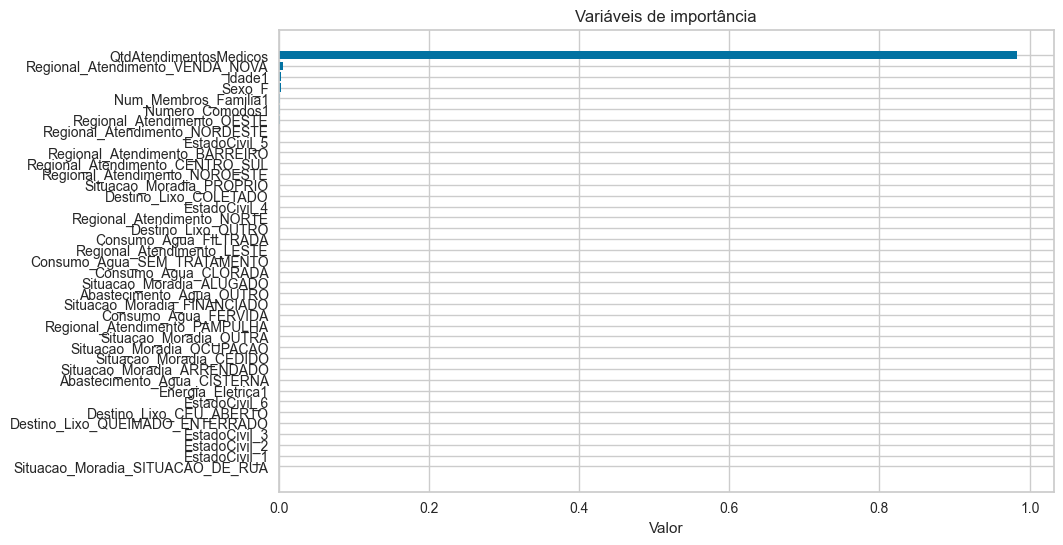

In [13]:
importance_features = modelo_QtdCID.feature_importances_
nomes_features = x_treino_QtdCID.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

In [73]:
x_teste_QtdCID.iloc[1:3,:]

,Idade1,EstadoCivil_1,EstadoCivil_2,EstadoCivil_3,EstadoCivil_4,EstadoCivil_5,EstadoCivil_6,Sexo_F,Num_Membros_Familia1,Energia_Eletrica1,...,QtdAtendimentosMedicos,Regional_Atendimento_BARREIRO,Regional_Atendimento_CENTRO_SUL,Regional_Atendimento_LESTE,Regional_Atendimento_NORDESTE,Regional_Atendimento_NOROESTE,Regional_Atendimento_NORTE,Regional_Atendimento_OESTE,Regional_Atendimento_PAMPULHA,Regional_Atendimento_VENDA_NOVA
1,63,1,0,0,0,0,0,1,4,1,...,4,0,0,0,0,0,1,0,0,0
2,66,1,0,0,0,0,0,1,4,1,...,9,0,0,0,0,1,0,0,0,0


In [74]:
modelo_QtdCID.predict(x_teste_QtdCID.iloc[1:3,:])

array([3.27760422, 5.81607981])

In [75]:
14*3

42

### Sem atendimentos

In [14]:
x_treino_QtdCID2, x_teste_QtdCID2 = treino_QtdCID[var_exp_SA], teste_QtdCID[var_exp_SA]

In [15]:
%%time
modelos_pycaret_QtdCid2 = setup(data = dados_QtdCID.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdCID', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 46)"
4,Transformed data shape,"(169203, 74)"
5,Transformed train set shape,"(126902, 74)"
6,Transformed test set shape,"(42301, 74)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3187,9.3002,3.0495,0.0354,0.5695,0.9461,5.8110
xgboost,Extreme Gradient Boosting,2.3304,9.4029,3.0663,0.0248,0.5721,0.9472,1.2640
br,Bayesian Ridge,2.3423,9.4335,3.0713,0.0216,0.5749,0.9615,1.4900
ada,AdaBoost Regressor,2.7206,10.9816,3.3115,-0.1390,0.6574,1.3055,3.3770
rf,Random Forest Regressor,2.5585,11.3917,3.3750,-0.1815,0.6219,1.0231,22.9920


CPU times: total: 8.98 s
Wall time: 6min 9s


GradientBoostingRegressor(random_state=13)

In [16]:
%%time
modelo_QtdCID2 = create_model('gbr').fit(x_treino_QtdCID2, y_treino_QtdCID)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3473,9.6800,3.1113,0.0343,0.5731,0.9474
1,2.3093,9.1865,3.0309,0.0345,0.5654,0.9331
2,2.3366,9.4128,3.0680,0.0327,0.5747,0.9695
3,2.3114,9.3635,3.0600,0.0383,0.5693,0.9482
4,2.3078,9.4064,3.0670,0.0355,0.5672,0.9408
5,2.3005,8.9631,2.9938,0.0375,0.5683,0.9500
6,2.3177,9.2482,3.0411,0.0358,0.5682,0.9418
7,2.3291,9.3334,3.0551,0.0398,0.5729,0.9546
8,2.3124,9.1350,3.0224,0.0336,0.5697,0.9456


CPU times: total: 9.77 s
Wall time: 1min 21s


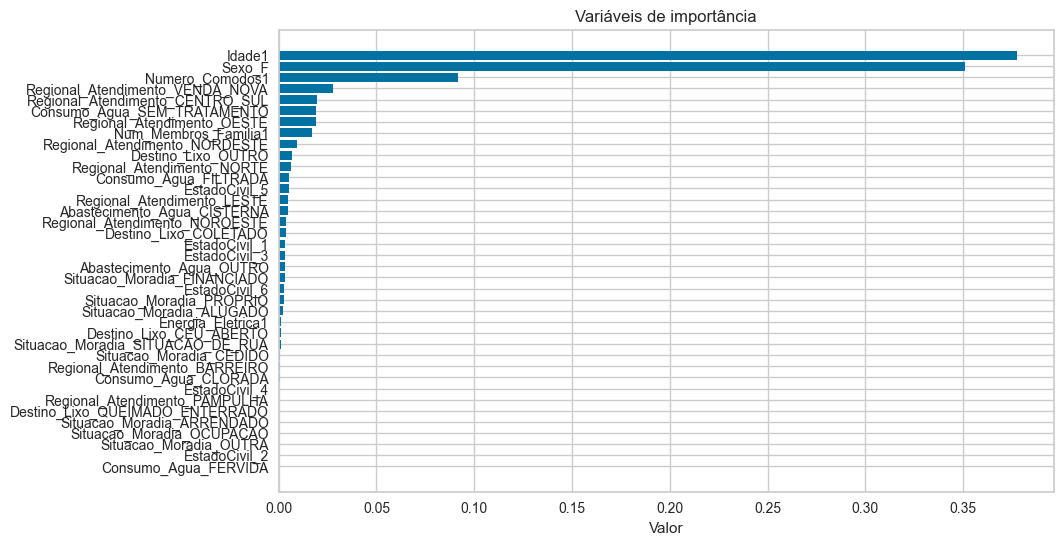

In [17]:
importance_features = modelo_QtdCID2.feature_importances_
nomes_features = x_treino_QtdCID2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## QtdMedicamentos

In [18]:
%%time
treino_QtdMedicamentos = pd.read_excel('treino QtdMedicamentos.xlsx')
teste_QtdMedicamentos = pd.read_excel('teste QtdMedicamentos.xlsx')
dados_QtdMedicamentos = pd.concat([treino_QtdMedicamentos, teste_QtdMedicamentos], ignore_index = True)

CPU times: total: 27.4 s
Wall time: 1min 2s


### Com atendimentos

In [19]:
x_treino_QtdMedicamentos, x_teste_QtdMedicamentos = treino_QtdMedicamentos[var_exp], teste_QtdMedicamentos[var_exp]
y_treino_QtdMedicamentos, y_teste_QtdMedicamentos = treino_QtdMedicamentos[['QtdMedicamentos']], teste_QtdMedicamentos[['QtdMedicamentos']]

In [20]:
%%time
modelos_pycaret_QtdMedicamentos = setup(data = dados_QtdMedicamentos, target='QtdMedicamentos', normalize = False, train_size = 0.75, fold = 10, 
                                        session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 47)"
4,Transformed data shape,"(169203, 75)"
5,Transformed train set shape,"(126902, 75)"
6,Transformed test set shape,"(42301, 75)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9454,1.7286,1.3147,0.4025,0.5019,0.5205,6.2190
xgboost,Extreme Gradient Boosting,0.9505,1.7631,1.3278,0.3906,0.5041,0.5259,1.3260
br,Bayesian Ridge,0.9858,1.8238,1.3504,0.3696,0.5139,0.4883,1.5150
rf,Random Forest Regressor,1.0031,1.9630,1.4010,0.3215,0.5353,0.5738,22.1280
ada,AdaBoost Regressor,1.1304,2.1077,1.4511,0.2711,0.5914,0.6324,5.0160


CPU times: total: 10.4 s
Wall time: 6min 26s


GradientBoostingRegressor(random_state=13)

In [21]:
%%time
modelo_QtdMedicamentos = create_model('gbr').fit(x_treino_QtdMedicamentos, y_treino_QtdMedicamentos)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9474,1.7440,1.3206,0.4037,0.4990,0.5187
1,0.9573,1.7633,1.3279,0.3894,0.5089,0.5197
2,0.9359,1.7136,1.3090,0.4049,0.5007,0.5204
3,0.9355,1.6923,1.3009,0.4131,0.5008,0.5142
4,0.9511,1.7508,1.3232,0.4068,0.5037,0.5170
5,0.9513,1.7488,1.3224,0.3939,0.5035,0.5264
6,0.9481,1.7491,1.3225,0.3895,0.5006,0.5245
7,0.9352,1.6878,1.2992,0.4136,0.4987,0.5218
8,0.9476,1.7329,1.3164,0.4083,0.4998,0.5214


CPU times: total: 13.2 s
Wall time: 1min 37s


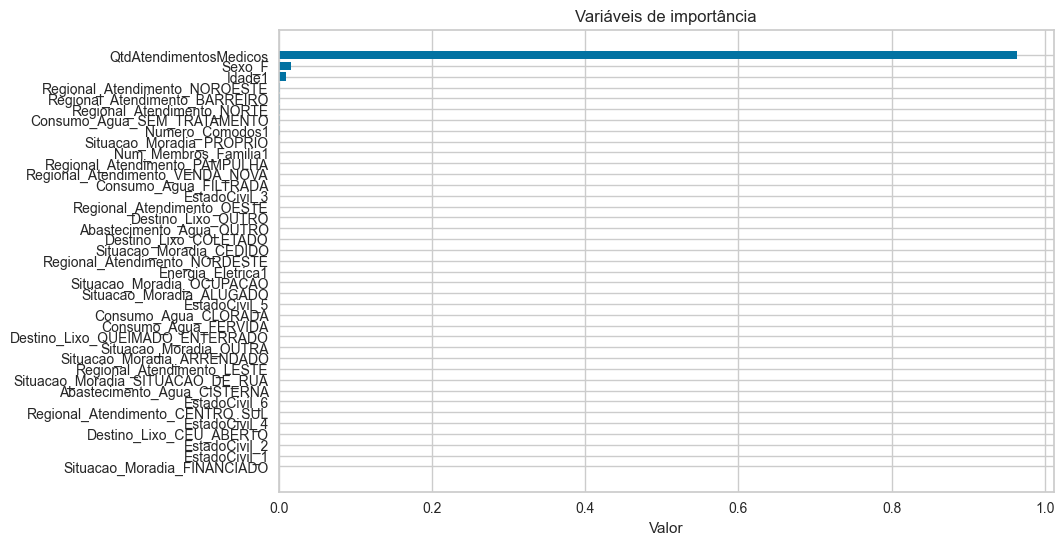

In [22]:
importance_features = modelo_QtdMedicamentos.feature_importances_
nomes_features = x_treino_QtdMedicamentos.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [23]:
x_treino_QtdMedicamentos2, x_teste_QtdMedicamentos2 = treino_QtdMedicamentos[var_exp_SA], teste_QtdMedicamentos[var_exp_SA]

In [24]:
%%time
modelos_pycaret_QtdMedicamentos2 = setup(data = dados_QtdMedicamentos.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdMedicamentos', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 46)"
4,Transformed data shape,"(169203, 74)"
5,Transformed train set shape,"(126902, 74)"
6,Transformed test set shape,"(42301, 74)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.2904,2.7691,1.6641,0.0429,0.6631,0.4507,5.2780
xgboost,Extreme Gradient Boosting,1.2939,2.7984,1.6728,0.0328,0.6656,0.4635,1.1860
br,Bayesian Ridge,1.3047,2.8066,1.6753,0.0299,0.6682,0.4520,1.3990
ada,AdaBoost Regressor,1.5206,3.2256,1.7954,-0.1150,0.7734,0.5838,3.3590
rf,Random Forest Regressor,1.4110,3.3996,1.8438,-0.1751,0.7245,0.5944,20.4630


CPU times: total: 10.5 s
Wall time: 5min 36s


GradientBoostingRegressor(random_state=13)

In [25]:
%%time
modelo_QtdMedicamentos2 = create_model('gbr').fit(x_treino_QtdMedicamentos2, y_treino_QtdMedicamentos)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2958,2.8020,1.6739,0.0419,0.6640,0.4489
1,1.2964,2.7701,1.6644,0.0408,0.6639,0.4531
2,1.2939,2.7670,1.6634,0.0390,0.6672,0.4525
3,1.2837,2.7475,1.6576,0.0471,0.6622,0.4460
4,1.2952,2.8092,1.6761,0.0483,0.6643,0.4476
5,1.2834,2.7578,1.6607,0.0443,0.6612,0.4471
6,1.2796,2.7394,1.6551,0.0438,0.6575,0.4499
7,1.2868,2.7530,1.6592,0.0435,0.6622,0.4545
8,1.2969,2.7983,1.6728,0.0446,0.6634,0.4526


CPU times: total: 12.9 s
Wall time: 1min 14s


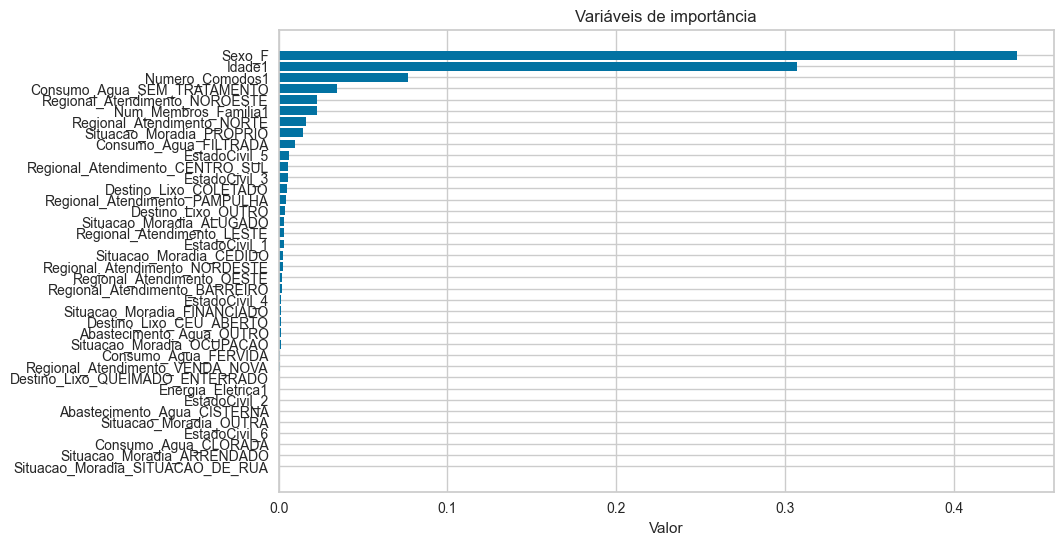

In [26]:
importance_features = modelo_QtdMedicamentos2.feature_importances_
nomes_features = x_treino_QtdMedicamentos2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTOS

In [27]:
%%time
treino_QtdENCAMINHAMENTOS = pd.read_excel('treino QtdENCAMINHAMENTOS.xlsx')
teste_QtdENCAMINHAMENTOS = pd.read_excel('teste QtdENCAMINHAMENTOS.xlsx')
dados_QtdENCAMINHAMENTOS = pd.concat([treino_QtdENCAMINHAMENTOS, teste_QtdENCAMINHAMENTOS], ignore_index = True)

CPU times: total: 1.98 s
Wall time: 3.74 s


### Com atendimentos

In [28]:
x_treino_QtdENCAMINHAMENTOS, x_teste_QtdENCAMINHAMENTOS = treino_QtdENCAMINHAMENTOS[var_exp], teste_QtdENCAMINHAMENTOS[var_exp]
y_treino_QtdENCAMINHAMENTOS = treino_QtdENCAMINHAMENTOS[['Qtd_ENCAMINHAMENTOS']]
y_teste_QtdENCAMINHAMENTOS = teste_QtdENCAMINHAMENTOS[['Qtd_ENCAMINHAMENTOS']]

In [29]:
%%time
modelos_pycaret_QtdENCAMINHAMENTOS = setup(data = dados_QtdENCAMINHAMENTOS, target='Qtd_ENCAMINHAMENTOS', normalize = False, train_size = 0.75, 
                                           fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTOS
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2705,0.2625,0.5019,0.0613,0.1679,0.1904,0.2940
br,Bayesian Ridge,0.2731,0.2675,0.5042,0.0600,0.1684,0.1943,0.0700
ada,AdaBoost Regressor,0.3217,0.2899,0.5213,0.0045,0.1790,0.2477,0.1100
rf,Random Forest Regressor,0.2894,0.2847,0.5241,-0.0312,0.1798,0.2124,0.7130
xgboost,Extreme Gradient Boosting,0.2876,0.2995,0.5397,-0.1043,0.1854,0.2072,0.1170


CPU times: total: 1.92 s
Wall time: 16.4 s


GradientBoostingRegressor(random_state=13)

In [30]:
%%time
modelo_QtdENCAMINHAMENTOS = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTOS, y_treino_QtdENCAMINHAMENTOS)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3019,0.6183,0.7863,0.2200,0.1820,0.1920
1,0.2823,0.2500,0.5000,0.0432,0.1759,0.1930
2,0.2616,0.1962,0.4429,0.0484,0.1631,0.1864
3,0.2799,0.2607,0.5106,0.0186,0.1771,0.1958
4,0.2547,0.1784,0.4224,-0.0061,0.1564,0.1927
5,0.2917,0.3087,0.5556,0.0861,0.1827,0.1922
6,0.2646,0.2149,0.4636,0.0482,0.1635,0.1916
7,0.2595,0.2206,0.4696,0.0400,0.1647,0.1848
8,0.2523,0.1933,0.4397,0.0251,0.1555,0.1911


CPU times: total: 766 ms
Wall time: 4.53 s


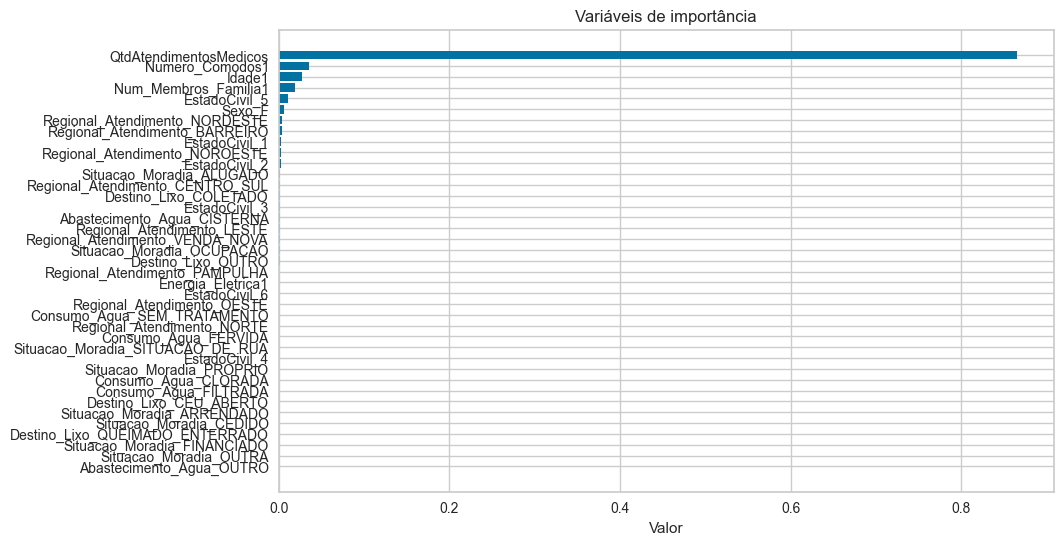

In [31]:
importance_features = modelo_QtdENCAMINHAMENTOS.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTOS.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [32]:
x_treino_QtdENCAMINHAMENTOS2, x_teste_QtdENCAMINHAMENTOS2 = treino_QtdENCAMINHAMENTOS[var_exp_SA], teste_QtdENCAMINHAMENTOS[var_exp_SA]

In [33]:
%%time
modelos_pycaret_QtdENCAMINHAMENTOS2 = setup(data = dados_QtdENCAMINHAMENTOS.drop(['QtdAtendimentosMedicos'],axis = 1), target='Qtd_ENCAMINHAMENTOS', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTOS
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2911,0.2898,0.5223,-0.0004,0.1729,0.2053,0.0720
gbr,Gradient Boosting Regressor,0.2905,0.2936,0.5260,-0.0154,0.1747,0.2050,0.2800
ada,AdaBoost Regressor,0.3655,0.3670,0.5781,-0.3469,0.1910,0.2868,0.1330
rf,Random Forest Regressor,0.3195,0.3602,0.5876,-0.3177,0.1966,0.2365,0.6950
xgboost,Extreme Gradient Boosting,0.3096,0.3678,0.5930,-0.3573,0.1955,0.2247,0.1170


CPU times: total: 1.25 s
Wall time: 15.6 s


BayesianRidge()

In [34]:
%%time
modelo_QtdENCAMINHAMENTOS2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTOS2, y_treino_QtdENCAMINHAMENTOS)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3284,0.7976,0.8931,-0.0062,0.2005,0.2076
1,0.3014,0.2629,0.5127,-0.0063,0.1808,0.2069
2,0.2851,0.2081,0.4562,-0.0095,0.1685,0.2056
3,0.2959,0.2726,0.5221,-0.0260,0.1814,0.2068
4,0.2702,0.1856,0.4308,-0.0464,0.1591,0.2044
5,0.3140,0.3475,0.5895,-0.0290,0.1941,0.2078
6,0.2797,0.2283,0.4778,-0.0112,0.1687,0.2025
7,0.2825,0.2312,0.4808,-0.0062,0.1702,0.2033
8,0.2668,0.1994,0.4466,-0.0059,0.1572,0.2021


CPU times: total: 1.02 s
Wall time: 4.34 s


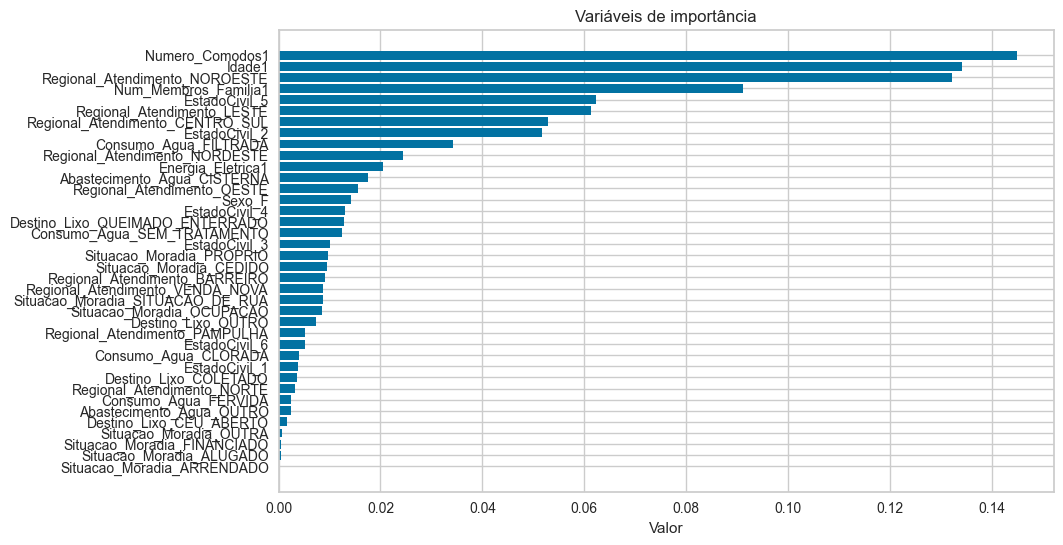

In [35]:
importance_features = modelo_QtdENCAMINHAMENTOS2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTOS2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE

In [36]:
%%time
treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.read_excel('treino QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.xlsx')
teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.read_excel('teste QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.xlsx')
dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.concat([treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                                                        teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE], ignore_index = True)

CPU times: total: 1.92 s
Wall time: 4.43 s


### Com atendimentos

In [37]:
x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp]
x_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp]
y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[['Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE']]
y_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[['Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE']]

In [38]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = setup(data = dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                        target='Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0326,0.0195,0.1360,0.0058,0.0873,0.9715,0.0790
gbr,Gradient Boosting Regressor,0.0313,0.0196,0.1367,-0.0072,0.0886,0.9567,0.3300
rf,Random Forest Regressor,0.0361,0.0223,0.1463,-0.1730,0.0997,0.9422,0.4610
xgboost,Extreme Gradient Boosting,0.0438,0.0241,0.1530,-0.3190,0.1029,0.9405,0.1340
ada,AdaBoost Regressor,0.1107,0.0336,0.1816,-0.9943,0.1361,0.8623,0.1370


CPU times: total: 1.45 s
Wall time: 14.3 s


BayesianRidge()

In [39]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                                                                      y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0319,0.0189,0.1375,-0.0209,0.0920,0.9650
1,0.0225,0.0066,0.0815,0.0494,0.0587,0.8899
2,0.0264,0.0116,0.1077,-0.1092,0.0769,0.9779
3,0.0410,0.0310,0.1760,-0.0000,0.1151,0.9724
4,0.0289,0.0185,0.1361,-0.0607,0.0847,0.9497
5,0.0315,0.0304,0.1744,0.0314,0.0959,0.9777
6,0.0339,0.0168,0.1295,-0.0372,0.0915,0.9726
7,0.0326,0.0225,0.1499,-0.0212,0.0962,0.9809
8,0.0268,0.0104,0.1019,0.0083,0.0720,0.9479


CPU times: total: 1 s
Wall time: 5.11 s


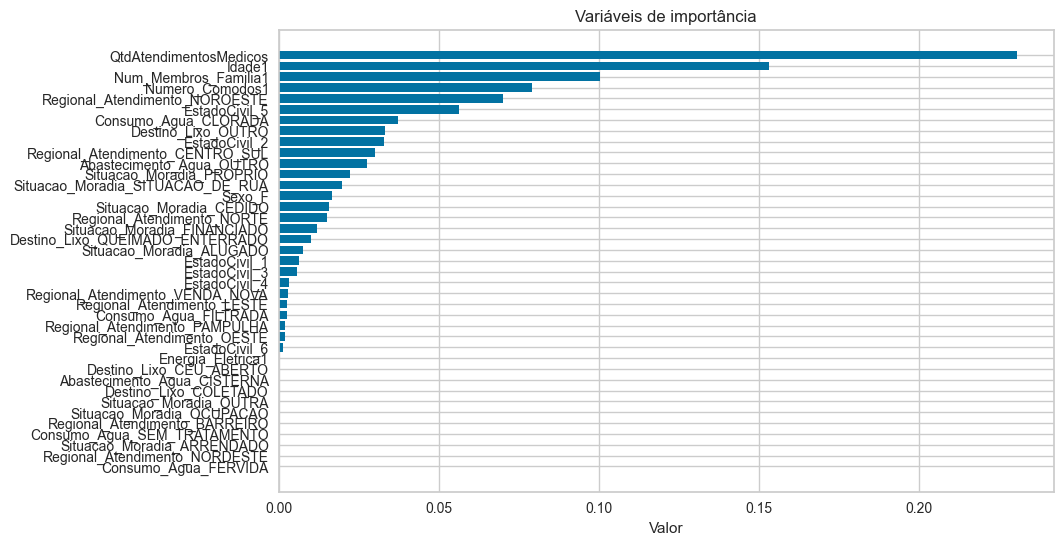

In [40]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [41]:
x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp_SA]
x_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp_SA]

In [42]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = setup(data = dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.drop(['QtdAtendimentosMedicos'],axis = 1), 
                                                              target='Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0317,0.0196,0.1362,0.0028,0.0874,0.9753,0.0760
gbr,Gradient Boosting Regressor,0.0315,0.0200,0.1379,-0.0239,0.0893,0.9689,0.3050
rf,Random Forest Regressor,0.0380,0.0255,0.1574,-0.3862,0.1081,0.9633,0.4490
xgboost,Extreme Gradient Boosting,0.0438,0.0260,0.1591,-0.4360,0.1067,0.9784,0.1260
ada,AdaBoost Regressor,0.0713,0.0282,0.1615,-0.4214,0.1128,0.9207,0.1170


CPU times: total: 1.41 s
Wall time: 14 s


BayesianRidge()

In [43]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2, 
                                                                       y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0333,0.0195,0.1396,-0.0527,0.0937,0.9788
1,0.0228,0.0071,0.0842,-0.0128,0.0600,0.9497
2,0.0275,0.0118,0.1088,-0.1327,0.0778,0.9777
3,0.0412,0.0308,0.1756,0.0042,0.1147,0.9617
4,0.0285,0.0176,0.1328,-0.0100,0.0836,0.9755
5,0.0320,0.0317,0.1779,-0.0079,0.0988,0.9786
6,0.0334,0.0171,0.1308,-0.0575,0.0921,0.9695
7,0.0323,0.0222,0.1490,-0.0090,0.0958,0.9829
8,0.0269,0.0101,0.1007,0.0309,0.0708,0.9427


CPU times: total: 969 ms
Wall time: 5.07 s


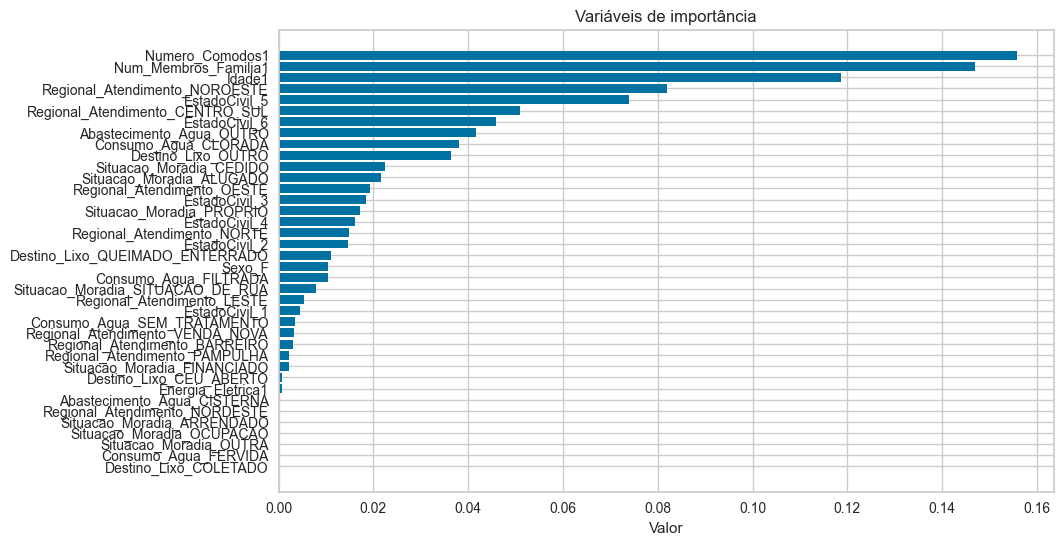

In [44]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL

In [45]:
%%time
treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.read_excel('treino QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.xlsx')
teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.read_excel('teste QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.xlsx')
dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.concat([treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                                                        teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL], ignore_index = True)

CPU times: total: 2.08 s
Wall time: 4.66 s


### Com atendimentos

In [46]:
x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp]
x_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp]
y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[['Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL']]
y_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[['Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL']]

In [47]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = setup(data = dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                        target='Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0068,0.0034,0.0559,-0.0001,0.0380,0.9944,0.0760
gbr,Gradient Boosting Regressor,0.0073,0.0035,0.0570,-0.0485,0.0392,0.9943,0.3290
rf,Random Forest Regressor,0.0084,0.0042,0.0633,-0.3673,0.0460,0.9875,0.3080
xgboost,Extreme Gradient Boosting,0.0129,0.0050,0.0695,-0.7561,0.0506,0.9858,0.1470
ada,AdaBoost Regressor,0.2822,0.1222,0.3388,-53.9733,0.2775,0.6663,0.3480


CPU times: total: 1.14 s
Wall time: 15.3 s


BayesianRidge()

In [48]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                                                                      y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0071,0.0028,0.0529,-0.1964,0.0378,0.9961
1,0.0084,0.0037,0.0609,-0.0565,0.0430,0.9918
2,0.0061,0.0024,0.0489,-0.0218,0.0342,0.9999
3,0.0086,0.0070,0.0837,0.0011,0.0502,0.9980
4,0.0051,0.0012,0.0350,-0.0450,0.0249,0.9922
5,0.0102,0.0071,0.0841,-0.0103,0.0585,0.9977
6,0.0070,0.0025,0.0495,-0.0450,0.0350,0.9891
7,0.0056,0.0013,0.0359,-0.0993,0.0257,1.0033
8,0.0078,0.0036,0.0604,-0.0376,0.0424,0.9962


CPU times: total: 891 ms
Wall time: 5.46 s


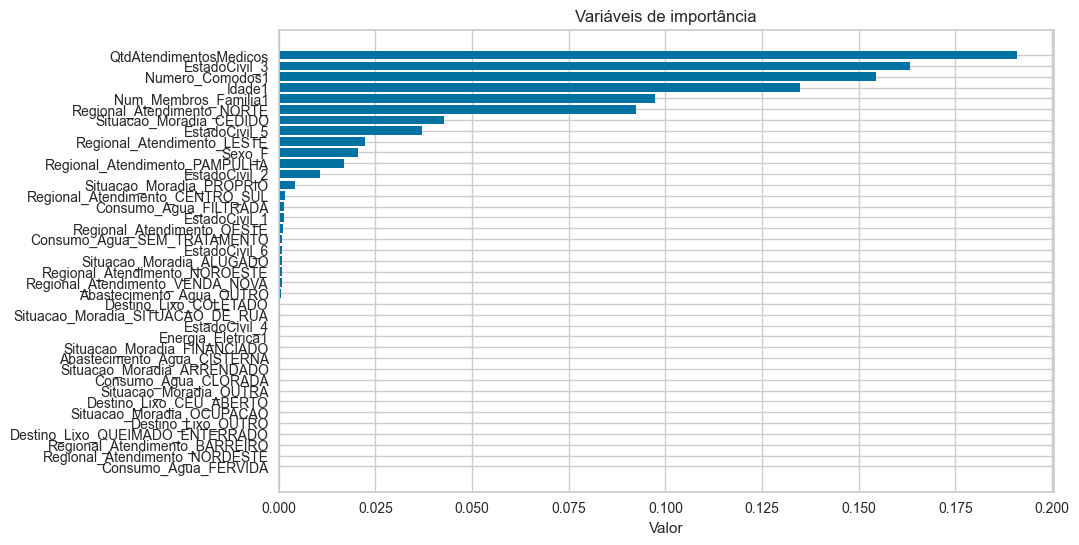

In [49]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [50]:
x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp_SA]
x_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp_SA]

In [51]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = setup(data = dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.drop(['QtdAtendimentosMedicos'],axis = 1), 
                                                              target='Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0067,0.0034,0.0559,-0.0009,0.0380,0.9953,0.0750
gbr,Gradient Boosting Regressor,0.0071,0.0035,0.0566,-0.0320,0.0389,0.9966,0.3080
rf,Random Forest Regressor,0.0084,0.0046,0.0662,-0.4786,0.0484,0.9983,0.2980
xgboost,Extreme Gradient Boosting,0.0123,0.0050,0.0688,-0.6255,0.0502,1.0010,0.1390
ada,AdaBoost Regressor,0.2898,0.1292,0.3481,-56.9309,0.2842,0.6768,0.3550


CPU times: total: 1.52 s
Wall time: 15.2 s


BayesianRidge()

In [52]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2, 
                                                                       y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0069,0.0025,0.0500,-0.0658,0.0355,0.9968
1,0.0074,0.0035,0.0593,-0.0015,0.0412,0.9912
2,0.0062,0.0024,0.0490,-0.0248,0.0342,1.0013
3,0.0085,0.0070,0.0839,-0.0030,0.0505,0.9983
4,0.0052,0.0012,0.0351,-0.0499,0.0250,0.9954
5,0.0101,0.0071,0.0840,-0.0087,0.0584,0.9969
6,0.0065,0.0024,0.0490,-0.0260,0.0345,0.9919
7,0.0051,0.0012,0.0353,-0.0632,0.0249,1.0033
8,0.0083,0.0038,0.0614,-0.0732,0.0436,0.9975


CPU times: total: 922 ms
Wall time: 5.22 s


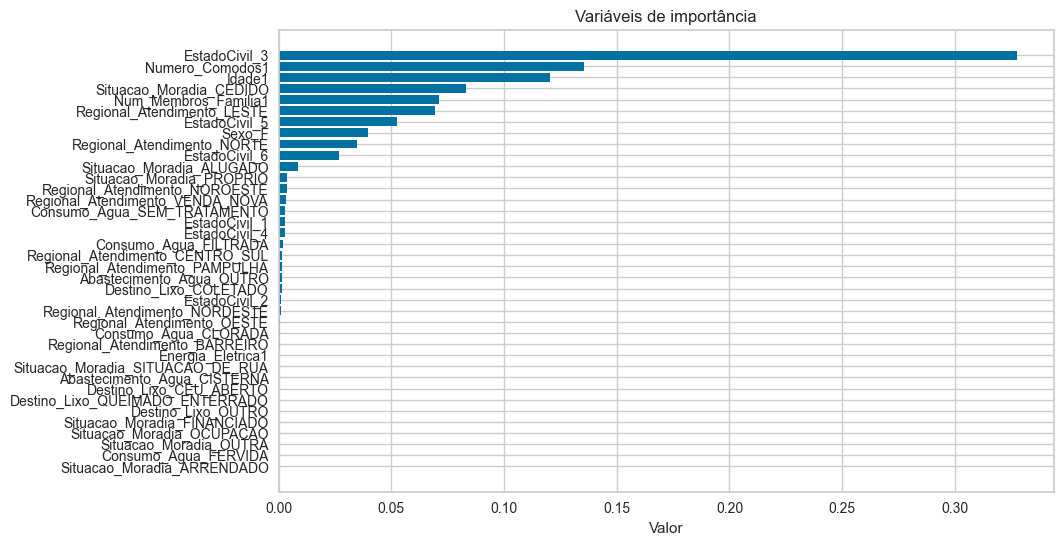

In [53]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()